In [17]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [18]:
import numpy as np
import pandas as pd

In [19]:
import datetime as dt

In [20]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

# Reflect Tables into SQLAlchemy ORM

### 9.1.5

### SQLite Intro

SQLite is a quick way to set up database engine w/o a server
    
    - files are flat: no relationships
    - SQLite database is similar to CSV file (1 or more tables with rows, columns) BUT can write queries
    - Advantages
        - local files enable quick testing
        - has mobile phone app
    - Disadvantages
        - local means no users, just you
        - redduced security features
        

SQL Alchemy is used to SQL queries for any type of SQL database
    
    - ORM or Object Relational Mapper creates CLASSES in code that are MAPPED to tables in database
        - you reference classes instead of tables to keep DECOUPLED
            - decoupled code keeps units isolated so you dont break everything
        - we can infuence each CLASS independently

#### create_engine()  function
    - sets up ability to query an SQLite database
    - do not actually connect the database, but it prepars the file for later connection


In [21]:
#prep database file to be connected
engine = create_engine("sqlite:///hawaii.sqlite")


#### automap_base() function
    - REFLECT existing databse into a MODEL
        - reflecting into a model means transfer contents of databse into a different structure
    - creates base CLASS (the 'table') for automap schema
#### prepare() function
    - after class is set up, you can reflect schema from tables to our code

In [22]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables to classes that help keep code separate
Base.prepare(engine, reflect=True)


#### We can view all of the classes that automap found

In [23]:
#view names of classes
Base.classes.keys()

['measurement', 'station']

#### Save references to each class in a variable

In [8]:
# Save references to each class in a variable
Measurement = Base.classes.measurement
Station = Base.classes.station

#### Create session link to DataBase
    - Allows us to query the database

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Climate Analysis

### 9.2.4 Plot precip vs dates

Text(0, 0.5, 'Precip per day')

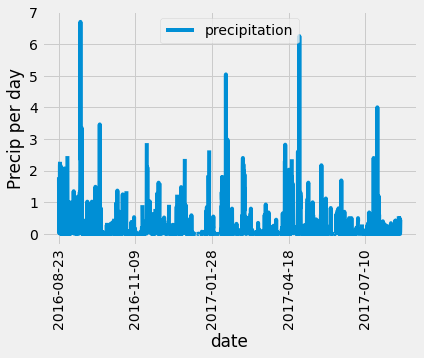

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

#Starting from the last data point in the database. 
prev_year = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a session query to retrieve the data and precipitation scores
results = []                          #store these session query results in a new list variable
results = session.query(Measurement.date, Measurement.prcp)\
                .filter(Measurement.date >= prev_year)\
                .all()

#print(results) #to make sure on the right track

# will need future access to these query results
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=True)

#print(df.to_string(index=False)) #view the df w/o index

# Sort the dataframe by date (index)
df = df.sort_index()
#print(df.to_string(index=False))

# Use Pandas Plotting with Matplotlib to plot the data
df.plot()
plt.tick_params(axis = "x", rotation=90)
plt.ylabel ("Precip per day")


### 9.2.5 Summary Stats

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


### 9.3.1 Find Number of Stations and How Active

In [12]:
# How many weather stations are available in this dataset?
session.query(func.count(Station.station)).all()


[(9,)]

In [13]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
            group_by(Measurement.station).\
            order_by(func.count(Measurement.station).desc()).\
            all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

### 9.3.3 High, Low, Avg Temps

In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature from most active station
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                filter(Measurement.station == 'USC00519281').\
                all()

[(54.0, 85.0, 71.66378066378067)]

### 9.3.4 Plot Highest Number of Observations

     tobs
0    77.0
1    77.0
2    80.0
3    80.0
4    75.0
..    ...
347  77.0
348  77.0
349  76.0
350  76.0
351  79.0

[352 rows x 1 columns]


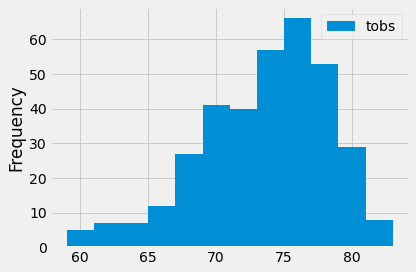

In [15]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station 

session.query(Measurement.tobs)

results = session.query(Measurement.tobs).\
                        filter(Measurement.station == 'USC00519281').\
                        filter(Measurement.date >= prev_year).\
                        all()

#print(results)

#convert results to DataFrame
df = pd.DataFrame(results, columns=['tobs'])  #paramater1 is results list, param2 is column(s)
print(df)

#plot the results as a histogram with 12 bins
df.plot.hist(bins=12)
plt.tight_layout()



# Program to run Flask (created in VS code)




### Dependencies

    import datetime as dt
    import numpy as np
    import pandas as pd
    import sqlalchemy
    from sqlalchemy.ext.automap import automap_base
    from sqlalchemy.orm import Session
    from sqlalchemy import create_engine, func
    from flask import Flask, jsonify


### 9.5.1 SET UP DATABASE

    #access database
    engine = create_engine("sqlite:///hawaii.sqlite")
    
    #reflect the db into our classes
    Base = automap_base()
    Base.prepare(engine, reflect=True)

    #save references to each table/class
    Measurement = Base.classes.measurement
    Station = Base.classes.station

    #create session link from python to database
    session = Session(engine)

### SET UP FLASK

    #create a flask app instance
    app = Flask(__name__)

    (to run flask:
        open anaconda powershell and type
        "set FLASK_APP=app.py" and hit enter then type
        "flask run" and hit enter
        and use address provided to view page)

### CREATE ROUTES AND FUNCTIONS

    #create WELCOME route 
    @app.route("/")

    #create function to reference f strings of other routes
    def welcome():
        return(
        '''
        Welcome to the Climate Analysis API!
        Available Routes:
        /api/v1.0/precipitation
        /api/v1.0/stations
        /api/v1.0/tobs
        /api/v1.0/temp/start/end
        ''')

    #create precipitation route and function
    @app.route("/api/v1.0/precipitation")
    def precipitation():

        #one year ago from most recent date
        prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

        #get date and precip from prev year
        precipitation = session.query(Measurement.date, Measurement.prcp).\
        filter(Measurement.date >= prev_year).all()

        #create dict w date key : precip value
        precip = {date: prcp for date, prcp in precipitation}
        return jsonify(precip)    

    #create stations route and function
    @app.route("/api/v1.0/stations")
    def stations():

        #query to get all stations
        results = session.query(Station.station).all()

        #convert to a list
        stations = list(np.ravel(results))

        #return list as json
        return jsonify(stations=stations)

    #create temperature route and function
    @app.route("/api/v1.0/tobs")
    def temp_monthly():

        #one year ago from most recent date
        prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

        #query primary station for temp observations from previous year
        results = session.query(Measurement.tobs).\
          filter(Measurement.station == 'USC00519281').\
          filter(Measurement.date >= prev_year).all()

        #unravel into list
        temps = list(np.ravel(results))

        #convert list to JSON
        return jsonify(temps=temps)

    #create statistics route and function with start and end dates
    @app.route("/api/v1.0/temp/<start>")
    @app.route("/api/v1.0/temp/<start>/<end>")

    #add parameters to function set to none
    def stats(start=None, end=None):

        #query to get stats with list called SELect
        sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]

        #use if-not to query with SEL list
        if not end:
            results = session.query(*sel).\
                filter(Measurement.date >= start).all()
            #unravel
            temps = list(np.ravel(results))
            #convert list to JSON
            return jsonify(temps=temps)

        #calculate statistics with start and end dates
        results = session.query(*sel).\
            filter(Measurement.date >= start).\
            filter(Measurement.date <= end).all()
        temps = list(np.ravel(results))
        return jsonify(temps)   



In [16]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
